本程序计算控制到输出的传输函数,参考Lee的模型,相关内容链接:https://www.notion.so/Flyback-253058cd607780b796d9dd75ed8c64f2
$$
\begin{align*}
&g_{vc}=g_{vc0}\dfrac{(1+\dfrac{s}{\omega_{esr}})(1-\dfrac{s}{\omega_{rhp}})}{(1+\dfrac{s}{\omega_{p1}})(1+\dfrac{s}{Q_1\omega_1}+\dfrac{s^2}{\omega_1^2})}\\
&\omega_{esr}=\dfrac{1}{R_{esr}C_o}\\[0.5cm]
&\omega_{P1}=\dfrac{1}{C_o(R_{esr}+R_{load})}\dfrac{1-k_2R_L}{1-\dfrac{k_2R_LR_{esr}}{R_{esr}+R_{load}}}\\[0.5cm]
&Q_1=\dfrac{1}{\pi(0.5+\dfrac{S_e-S_f}{S_n+S_f})}\\[0.5cm]
&\omega_1=\dfrac{\pi}{T_{sw}}\\[0.5cm]
&g_{vc0}=\dfrac{1}{R_{i}}\dfrac{DV_{IN}}{V_O}\dfrac{R_load}{1-k_2R_L}\\[0.5cm]
&k_2=-\dfrac{n^2(1-D)^3T_{sw}}{2L_m}-\dfrac{n(1-D)}{V_{in}+nV_O}(\dfrac{V_o}{(1-D)R_L}+\dfrac{n}{R_{i}}S_e(1-D)T_{sw})\\[0.5cm]
&D=\dfrac{nV_o}{V_{in}+nV_o}\\[0.5cm]
&S_n=\dfrac{R_iV_{in}}{L_m}\\[0.5cm]
&S_f=\dfrac{nR_iV_{o}}{L_m}\\[0.5cm]
&n=\dfrac{N_p}{N_s}
\end{align*}
$$

(array([-4867003.10987441+0.j,   -20278.60644747+0.j,
           -7542.32225337+0.j]),
 array([462222.22222222+0.j, -60790.27355623+0.j]))

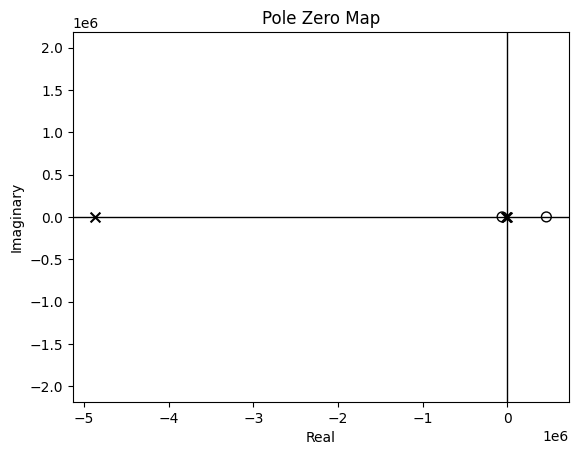

In [9]:
import control
s=control.tf('s')
pi=3.1415926
ri=0.15
rload=1
vin=160
vout=10
ts=10e-6
n=6.5
lm=160e-6
se=1e6
cout=940e-6
resr=17.5e-3
d=n*vout/(vin+n*vout)
sn=ri*vin/lm
sf=ri*n*vout/lm
k2=-n*n*(1-d)*(1-d)*(1-d)*ts/2/lm-n*(1-d)/(vin+n*vout)*(vout/(1-d)/rload+n/ri*se*(1-d)*ts)
gvc0=(1/ri)*(d*vin/vout)*rload/(1-k2*rload)
wesr=1/resr/cout
wrhp=(1-d)*(1-d)*n*n*rload/d/lm
wp1=1/cout/(resr+rload)*(1-k2*rload)/(1-k2*rload*resr/(resr+rload))
q1=1/pi/(0.5+(se-sf)/(sn+sf))
w1=pi/ts
gvc=gvc0*(1+s/wesr)*(1-s/wrhp)/(1+s/wp1)/(1+s/q1/w1+s*s/w1/w1)
control.pzmap(gvc)